### CLUSTURING 

In [183]:
%matplotlib inline
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
from sklearn import preprocessing

In [184]:
df=pd.read_csv("baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [186]:
b=df.drop(['RankSeason','RankPlayoffs'],axis=1)

In [187]:
b.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,162,0.335,0.424


In [188]:
data=b.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 13 columns):
Team        420 non-null object
League      420 non-null object
Year        420 non-null int64
RS          420 non-null int64
RA          420 non-null int64
W           420 non-null int64
OBP         420 non-null float64
SLG         420 non-null float64
BA          420 non-null float64
Playoffs    420 non-null int64
G           420 non-null int64
OOBP        420 non-null float64
OSLG        420 non-null float64
dtypes: float64(5), int64(6), object(2)
memory usage: 45.9+ KB


In [189]:
sum(data.duplicated())

0

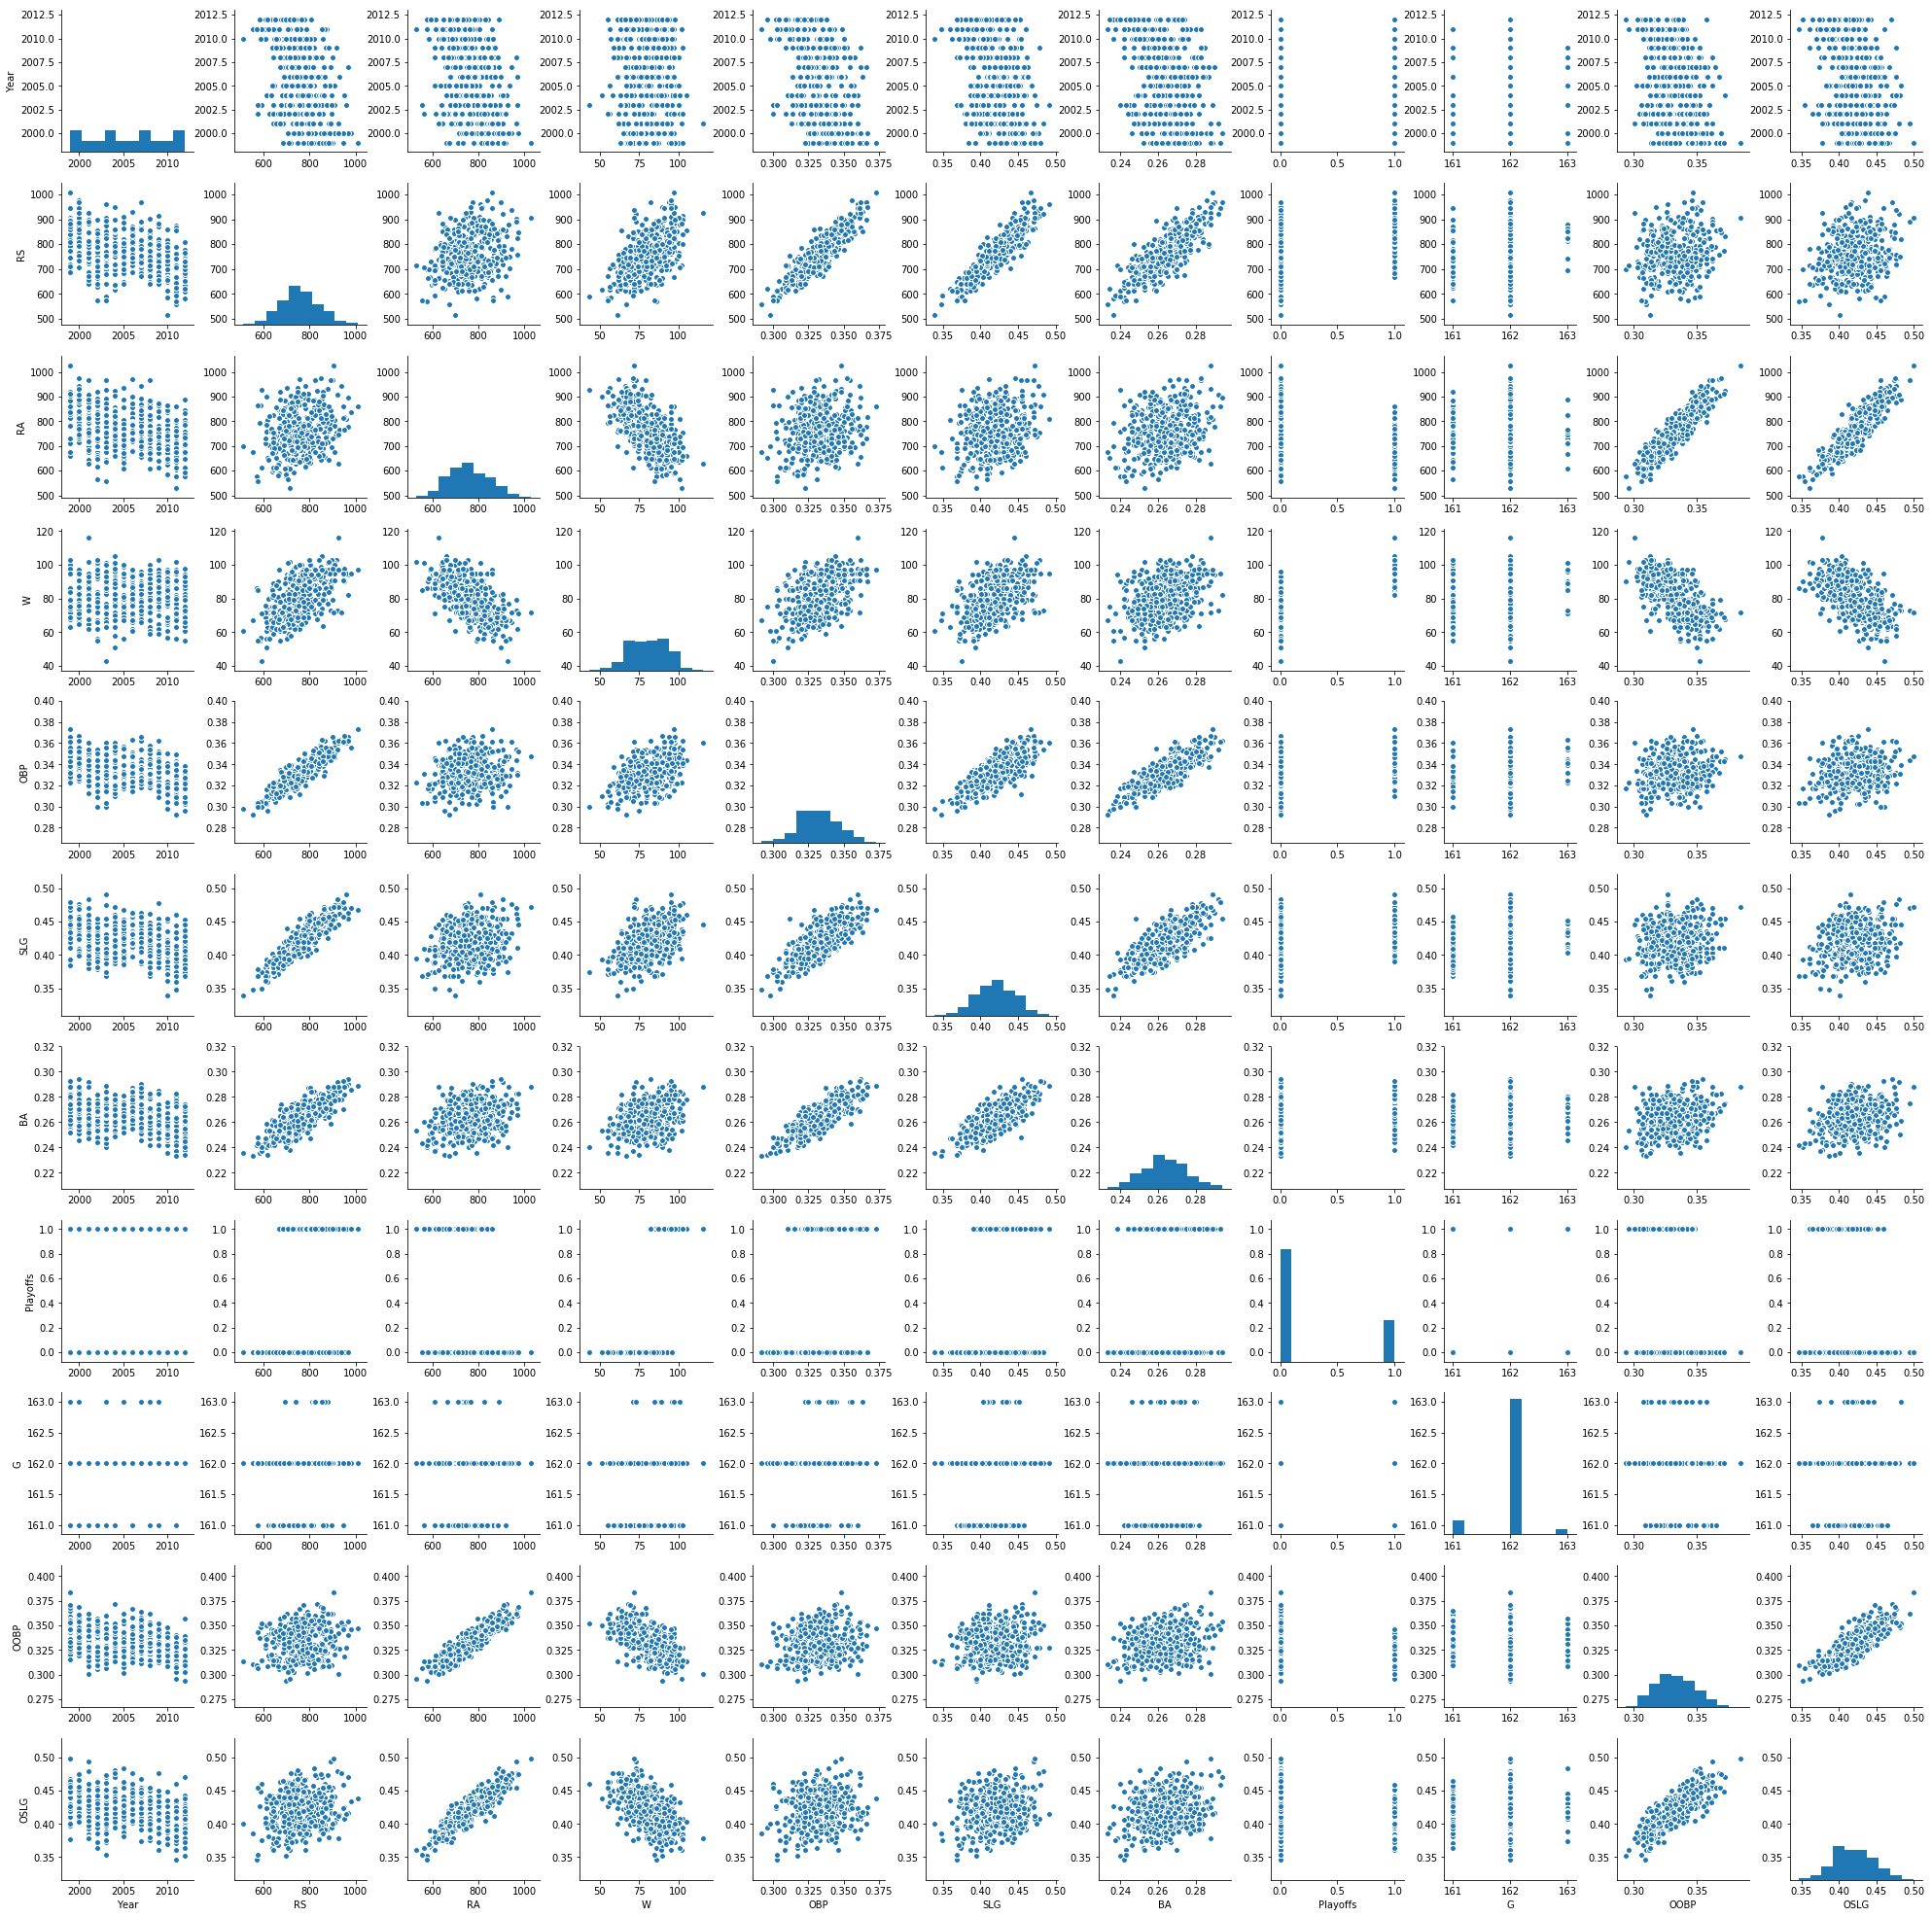

In [190]:
sns.pairplot(data)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5]), <a list of 11 Text yticklabel objects>)

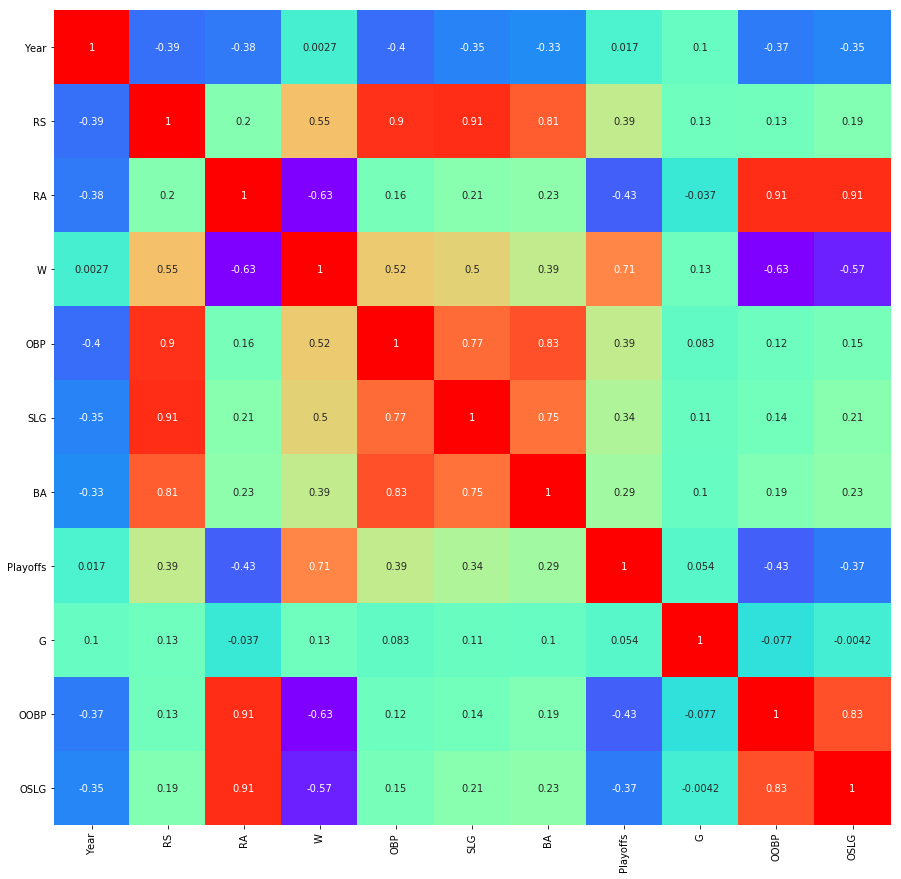

In [195]:
sns.heatmap(data.corr(),annot=True,cmap='rainbow',cbar=False)
plt.rcParams['figure.figsize']=(15,15)
plt.xticks(rotation=90)
plt.yticks(rotation=360)

#### CLUSTURING USING KMEANS 

In [192]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

In [196]:
k_means=KMeans(n_clusters=5)
x=data[['RS','RA']]
x.head()

,RS,RA
0,734,688
1,700,600
2,712,705
3,734,806
4,613,759


In [197]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [198]:
k_means.cluster_centers_

array([[ 700.5       ,  634.29310345],
       [ 800.86046512,  714.08527132],
       [ 878.60294118,  842.10294118],
       [ 668.65060241,  752.62650602],
       [ 729.54878049,  858.15853659]])

In [199]:
k_means.labels_

array([0, 0, 3, 4, 3, 0, 0, 4, 4, 0, 3, 3, 1, 0, 3, 1, 4, 3, 1, 0, 0, 0, 3,
       0, 0, 0, 0, 1, 3, 0, 0, 0, 4, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 0, 0, 0,
       3, 3, 1, 0, 0, 3, 0, 3, 0, 1, 0, 1, 1, 0, 4, 0, 3, 1, 3, 1, 1, 3, 1,
       1, 3, 3, 4, 3, 3, 4, 1, 0, 1, 0, 0, 3, 0, 3, 0, 0, 1, 1, 1, 3, 3, 0,
       4, 1, 0, 3, 3, 4, 1, 1, 1, 3, 4, 2, 0, 4, 1, 3, 2, 1, 1, 3, 3, 3, 0,
       0, 1, 1, 1, 4, 3, 1, 4, 1, 1, 1, 3, 1, 4, 2, 1, 3, 3, 1, 0, 1, 1, 1,
       1, 3, 1, 4, 3, 3, 3, 1, 1, 2, 0, 3, 3, 1, 4, 1, 1, 4, 4, 1, 1, 2, 4,
       4, 3, 1, 1, 1, 3, 1, 2, 3, 2, 4, 0, 4, 3, 4, 4, 2, 1, 3, 1, 2, 4, 2,
       4, 2, 4, 2, 2, 1, 1, 1, 4, 1, 1, 4, 1, 1, 2, 1, 2, 3, 0, 4, 4, 1, 4,
       2, 1, 4, 4, 1, 4, 2, 3, 0, 2, 1, 4, 3, 3, 0, 4, 0, 3, 0, 0, 0, 2, 1,
       1, 3, 3, 3, 3, 1, 4, 2, 1, 0, 1, 4, 1, 2, 2, 1, 2, 4, 2, 2, 2, 0, 1,
       4, 1, 3, 1, 3, 3, 2, 1, 2, 3, 1, 4, 1, 1, 4, 2, 4, 3, 0, 2, 4, 2, 0,
       1, 4, 3, 2, 4, 1, 1, 2, 0, 4, 1, 3, 3, 1, 0, 1, 4, 4, 1, 0, 2, 4, 2,
       2, 1,

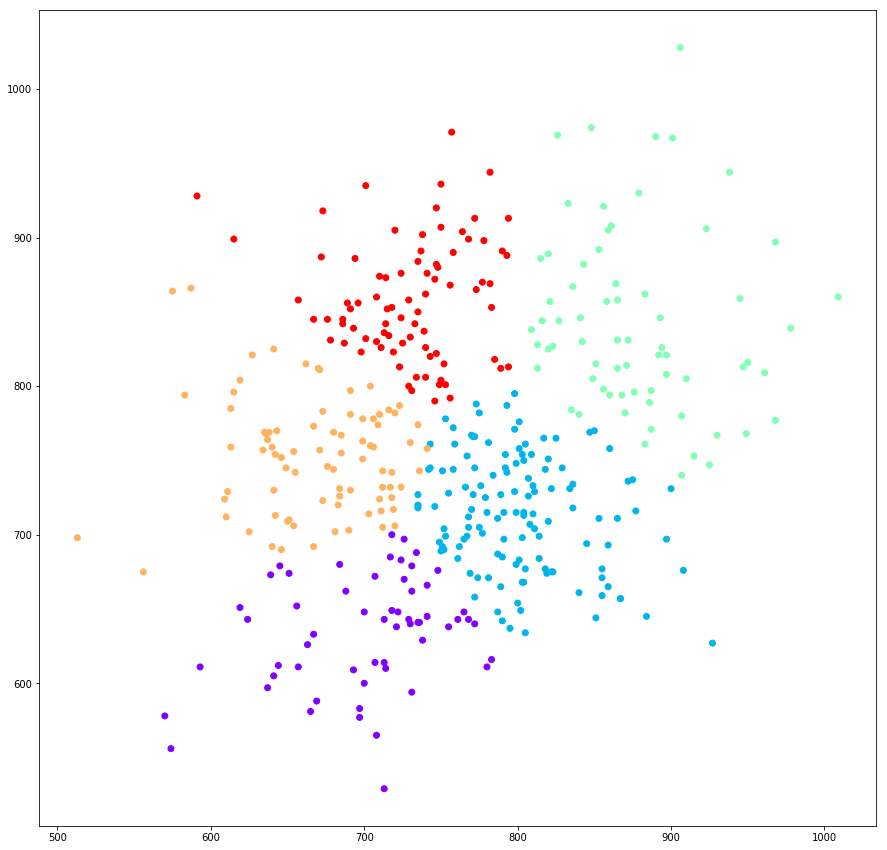

In [200]:
plt.scatter(x['RS'],x['RA'],c=k_means.labels_,cmap='rainbow')

In [201]:
#from sklearn.datasets import load_digits
#digits = load_digits()
#print digits.data.shape
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(x)
kmeans.cluster_centers_.shape

(5, 2)

Text(0.5,1,'Normalised K-means')

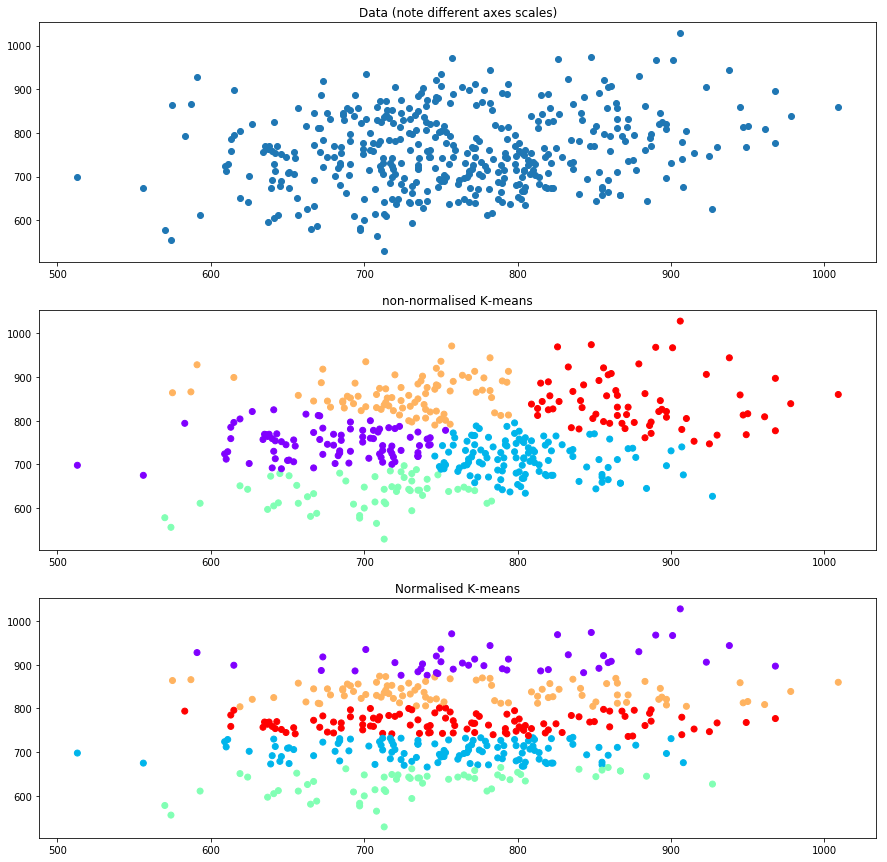

In [202]:
fig, axes = plt.subplots(3, 1)

axes[0].scatter(x['RS'],x['RA'])
axes[0].set_title('Data (note different axes scales)')

km = KMeans(5)

clusters = km.fit_predict(np.array([x['RS'],x['RA']]).T)

axes[1].scatter(x['RS'],x['RA'], c=clusters, cmap='rainbow')
axes[1].set_title('non-normalised K-means')

clusters = km.fit_predict(np.array([x['RS'] / 10, x['RA']]).T)

axes[2].scatter(x['RS'],x['RA'], c=clusters, cmap='rainbow')
axes[2].set_title('Normalised K-means')

#### Hierarchical: Agglomerative Clustering 

Counter({0: 116, 2: 88, 4: 83, 3: 69, 1: 64})


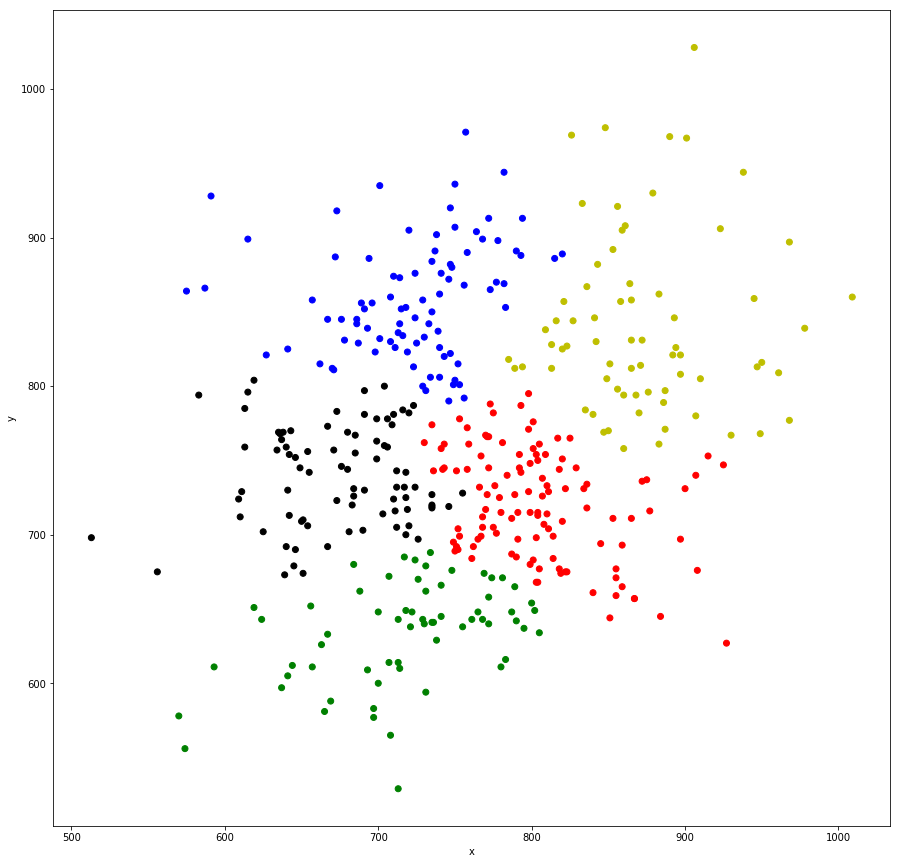

In [203]:
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=5)
y=data[['RS','RA']]
estimator.fit(y)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(x['RS'],x['RA'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({-1: 335, 2: 11, 5: 10, 0: 7, 1: 7, 3: 7, 8: 6, 6: 6, 7: 6, 9: 5, 12: 5, 4: 5, 11: 5, 10: 5})


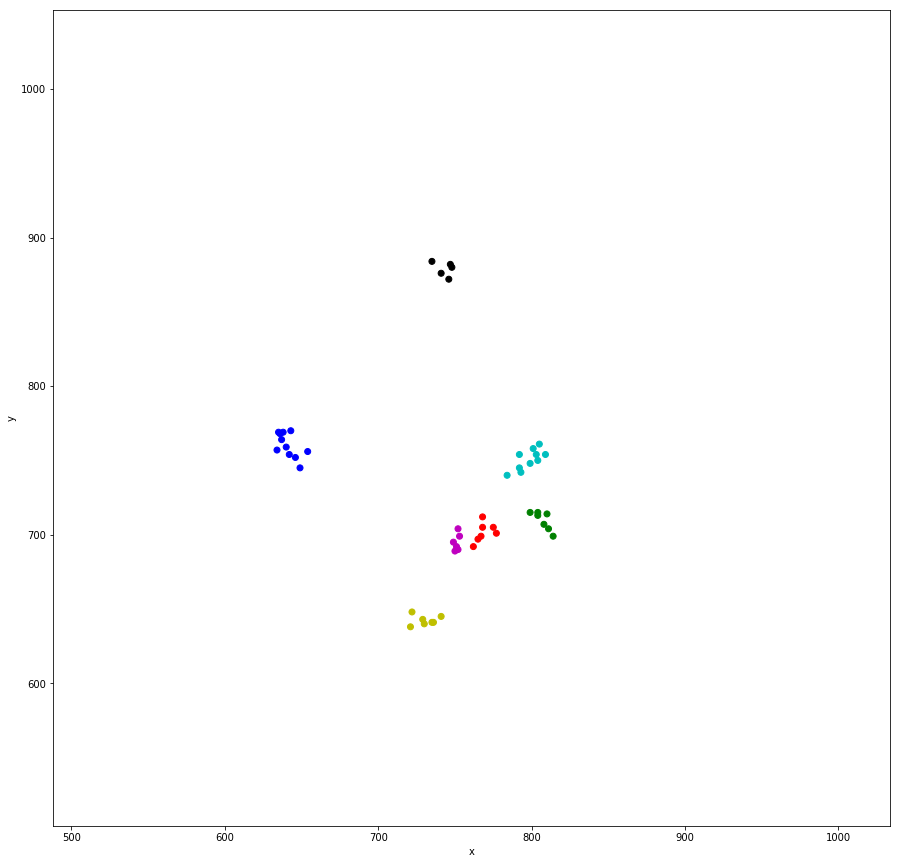

In [204]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=10, min_samples=5)
z=data[['RS','RA']]
estimator.fit(z)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# print labels
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(x['RS'],x['RA'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Text(0.5,1,'Normalised DBSCAN')

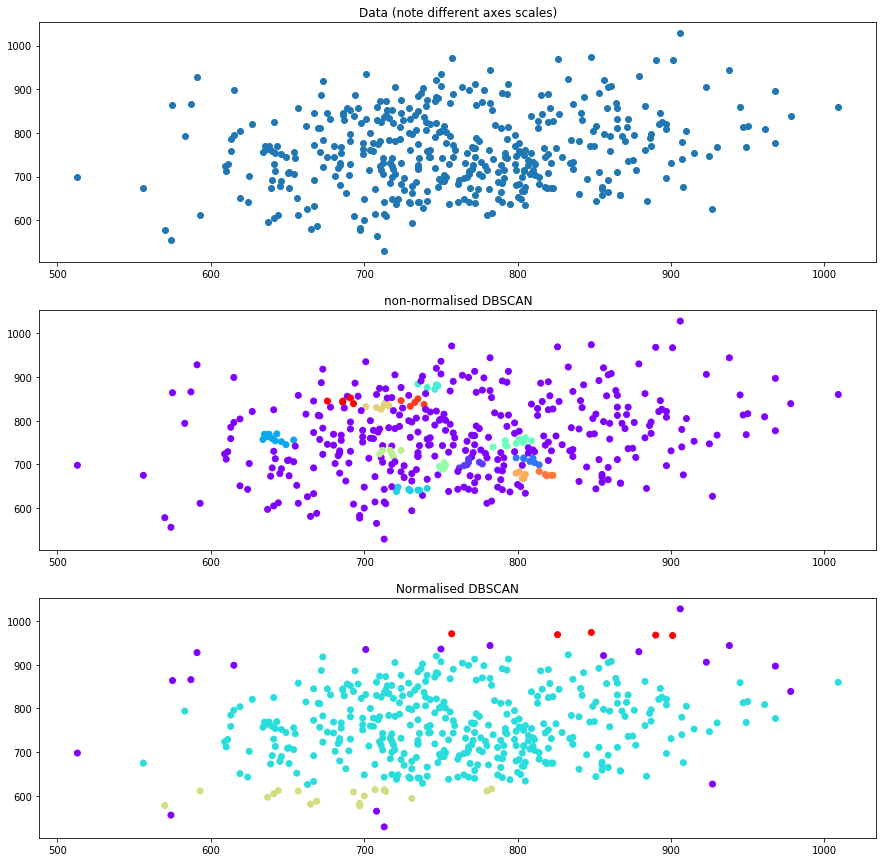

In [205]:
fig, axes = plt.subplots(3, 1)

axes[0].scatter(z['RS'],z['RA'])
axes[0].set_title('Data (note different axes scales)')

dbscan = DBSCAN(eps=10, min_samples=5)

clusters = dbscan.fit_predict(np.array([z['RS'],z['RA']]).T)

axes[1].scatter(z['RS'],z['RA'], c=clusters, cmap='rainbow')
axes[1].set_title('non-normalised DBSCAN')

clusters = dbscan.fit_predict(np.array([z['RS'] / 10, z['RA']]).T)

axes[2].scatter(z['RS'],z['RA'], c=clusters, cmap='rainbow')
axes[2].set_title('Normalised DBSCAN')

In [206]:
from sklearn.metrics import silhouette_score,accuracy_score,confusion_matrix
print(metrics.silhouette_score(x, labels, metric='euclidean'))
print(metrics.silhouette_score(y, labels, metric='euclidean'))
print(metrics.silhouette_score(z, labels, metric='euclidean'))

-0.388503787744
-0.388503787744
-0.388503787744


Answering the following questions:

* Do the clustering methods generate the same clusters?
  - The Clusturing methods that I used are KMeans,DBSCAN and Hierarchical Clustering.Each Technique gave different clusturing output depending on the type of the clusturing. 
  - KMeans Clusturing forms seperate groups of clusturs base on the number of cluster chosen and the centroid of each cluster acts as mean of that cluster.
  - DBSCAN is a Density based Clustering technique that has fixed radius around which the clustering is done.
  - Hierarchical Clustering forms a tree like clusters and Agglomerative clustering technique is used to merge the similar/closest objects into a single cluster.
  - However, The Plots for KMeans and Hierarchical Clusturing are same while DBSCAN is giving different result depending on the value of eps and min_values.
* Does scaling effect the clustering?
  - When we do the scaling on kmeans and DBSCAN techniques and plot the ouput on the graph, we see that we get different clusters and hence the scaling affect the clustering.
* Does the clustering produce interesting groupings?
  - Yes, Different clusters are formed based on clustering type. KMeans will form clusters that are close to the centroid of particular cluster. DBSCAN generate the cluster based on the points that are closely packed together and the radius is fixed around which the clustering is done. The Values that are beyond the radius are neglected. Agglomerative Hierarchical clustering technique forms hierarchical cluster based on the similar/closest values.